In [2]:
import numpy as np
import astropy as ap
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import math as m
import argparse
from astropy.modeling.fitting import LevMarLSQFitter
from astropy.modeling.models import custom_model
from matplotlib.backends.backend_pdf import PdfPages
import scipy as sp
from scipy import integrate
import uncertainties as unc
import uncertainties
from uncertainties import unumpy as unp
import kcorrect
import kcorrect.utils as ut
from astropy.cosmology import FlatLambdaCDM
import pandas as pd
import matplotlib as mp
import os

In [3]:
plt.style.use('seaborn-whitegrid')
plt.style.use('default')
params = {
    'axes.labelsize': 11,
    'legend.fontsize': 12,
    'xtick.labelsize': 13,
    'ytick.labelsize': 13,
    'text.usetex': True,
    'figure.figsize': [7, 4], # instead of 4.5, 4.5
    'grid.linestyle': ':',
    'axes.edgecolor' : '0',
    'font.family':'serif',
    'font.serif':'Computer Modern'
    }
mp.rcParams.update(params)

In [4]:
PARAM_DIR='/home/lrhunt/Projects/LCBG_LUMINOSITY_FUNCTION_PLOTTING/CODE/production/lumfunc_fit_params/'

In [8]:
LCBG_FIT_VALS=pd.read_csv(PARAM_DIR+'lcbg_lumfunc_fit.csv',index_col=0)

In [10]:
LCBG_FIT_VALS.loc['10_35_LCBG','PHI_ufl']

'0.00141+/-0.00007'

In [7]:
GAL_BIAS_CUTOFF={GAL_LFS_INDEX[0]:-17,
                 GAL_LFS_INDEX[1]:-19,
                 GAL_LFS_INDEX[2]:-20,
                 GAL_LFS_INDEX[3]:-20.5,
                 GAL_LFS_INDEX[4]:-20,}
LCBG_BIAS_CUTOFF={LCBG_LFS_INDEX[0]:-17,
                 LCBG_LFS_INDEX[1]:-19,
                 LCBG_LFS_INDEX[2]:-20,
                 LCBG_LFS_INDEX[3]:-20.5,
                 LCBG_LFS_INDEX[4]:-20,}

In [34]:
[LCBG_FIT_VALS.loc[[ind for ind in LCBG_FIT_VALS.index if 'LCBG' in ind],'ave_z'].values-LCBG_FIT_VALS.loc[[ind for ind in LCBG_FIT_VALS.index if 'LCBG' in ind],'low_z'].values,
LCBG_FIT_VALS.loc[[ind for ind in LCBG_FIT_VALS.index if 'LCBG' in ind],'high_z'].values-LCBG_FIT_VALS.loc[[ind for ind in LCBG_FIT_VALS.index if 'LCBG' in ind],'ave_z'].values]

[array([0.125, 0.1  , 0.1  , 0.125]), array([0.125, 0.1  , 0.1  , 0.125])]

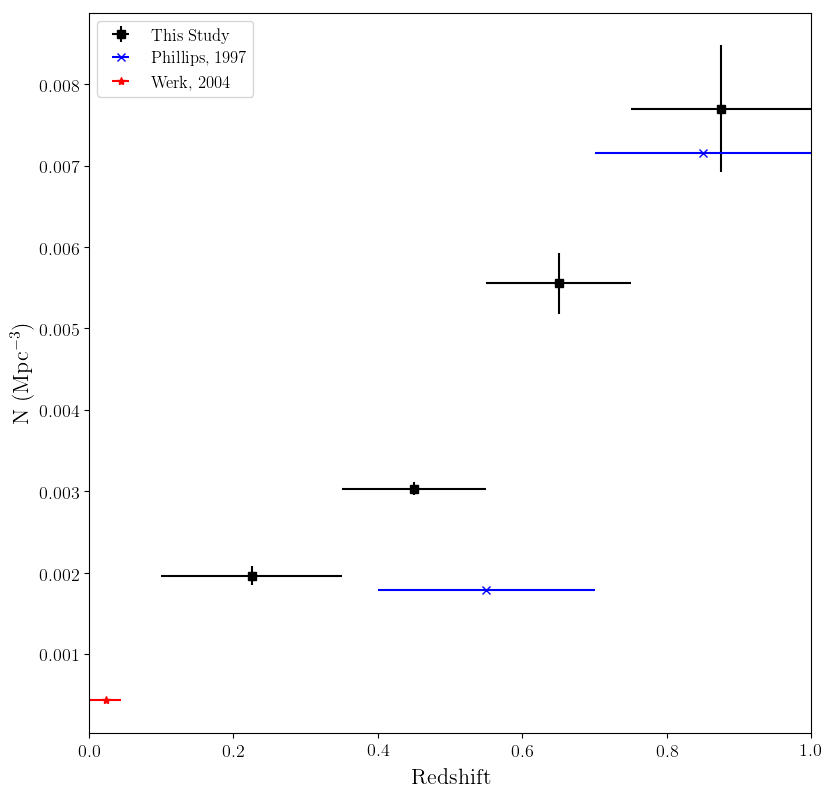

In [38]:
f,ax=plt.subplots(figsize=(8.5,8))
ax.errorbar(LCBG_FIT_VALS.loc[[ind for ind in LCBG_FIT_VALS.index if 'LCBG' in ind],'ave_z'],
            LCBG_FIT_VALS.loc[[ind for ind in LCBG_FIT_VALS.index if 'LCBG' in ind],'INT_NUM_DENS_EIGHTEENFIVE_val'],
            yerr=LCBG_FIT_VALS.loc[[ind for ind in LCBG_FIT_VALS.index if 'LCBG' in ind],'INT_NUM_DENS_EIGHTEENFIVE_err'],
            xerr=LCBG_FIT_VALS.loc[[ind for ind in LCBG_FIT_VALS.index if 'LCBG' in ind],
                                                   'high_z'].values-
                                 LCBG_FIT_VALS.loc[[ind for ind in LCBG_FIT_VALS.index if 'LCBG' in ind],
                                                   'ave_z'].values,
            color='black',
            marker='s',
            ls='none',
            label='This Study')
ax.errorbar(0.55,0.0022*(70./75.)**3,color='blue',marker='x',xerr=0.15,ls='none',label='Phillips, 1997')
ax.errorbar(0.85,0.0088*(70./75.)**3,color='blue',marker='x',xerr=0.15,ls='none')
ax.errorbar(0.023,0.00054*(70./75.)**3,color='red',marker='*',xerr=0.022,ls='none',label='Werk, 2004')
ax.set_xlim([0,1])
plt.xlabel('Redshift',fontsize=16)
plt.ylabel('N (Mpc$^{-3}$)',fontsize=16)
plt.legend(loc='upper left')
plt.subplots_adjust(right=0.98,left=0.13,top=0.97,bottom=0.07)
plt.savefig('/home/lrhunt/Projects/LCBG_LUMINOSITY_FUNCTION_PLOTTING/PLOTS/PAPER/Number_Density.pdf')